In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
shootings = pd.read_csv('denver_police_officer_involved_shootings.csv')

In [3]:
subs = shootings[shootings['ROLE'] == 'Subject']

In [9]:
long = subs.groupby(['RACE', 'CASUALTY'])['INCIDENT_NUMBER'].count().reset_index()
long.columns = ['Race', 'Casualty', 'Count']

In [10]:
long

,Race,Casualty,Count
0,A,Deceased,1
1,B,Deceased,2
2,B,Injured,8
3,B,Not Injured,1
4,W,Deceased,13
5,W,Injured,7
6,W,Not Injured,4


In [15]:
long['Race'] = long['Race'].replace('A', 'Asian/Pacific Islander')
long['Race'] = long['Race'].replace('W', 'White')
long['Race'] = long['Race'].replace('B', 'Black')

In [16]:
wide = long.pivot_table(index='Race', columns='Casualty', values='Count').fillna(0.0)

In [22]:
wide

Casualty,Deceased,Injured,Not Injured
Race,,,
Asian/Pacific Islander,1.0,0.0,0.0
Black,2.0,8.0,1.0
White,13.0,7.0,4.0


In [30]:
plt.rcParams['figure.figsize'] = (16, 9)

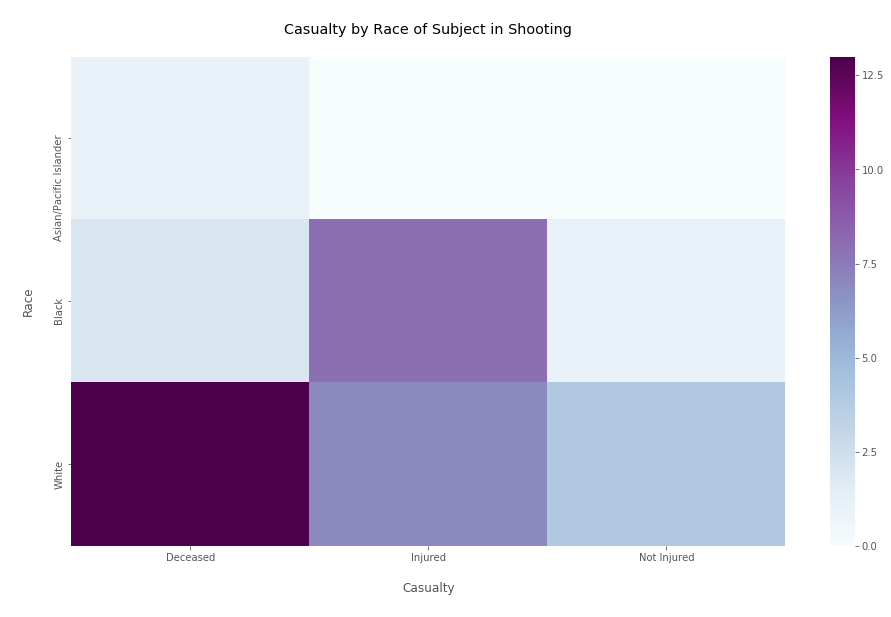

In [34]:
sns.heatmap(wide, cmap="BuPu")
plt.xlabel('\nCasualty\n')
plt.ylabel('\nRace\n')
plt.title('\nCasualty by Race of Subject in Shooting\n')
plt.savefig('HeatMap.png')